In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
sj = pd.read_csv('Data/sj_features_imputed_20200519.csv', parse_dates=['week_start_date'], index_col='week_start_date')
iq = pd.read_csv('Data/iq_features_imputed_20200520.csv', parse_dates=['week_start_date'], index_col='week_start_date')

label = pd.read_csv('Data/dengue_labels_train_raw.csv')

# Exploratory Data Analysis

In [3]:
# Split label
sj_label = label[label.city == 'sj']
iq_label = label[label.city == 'iq']


# Find number of training data in each city
sj_train_no = sj_label.shape[0]
iq_train_no = iq_label.shape[0]

# Set labels' index
sj_label.index = sj.index[:sj_train_no]
iq_label.index = iq.index[:iq_train_no]

# Drop other columns
sj_y = sj_label[["total_cases"]]
iq_y = iq_label[["total_cases"]]

### Time-Series Plot

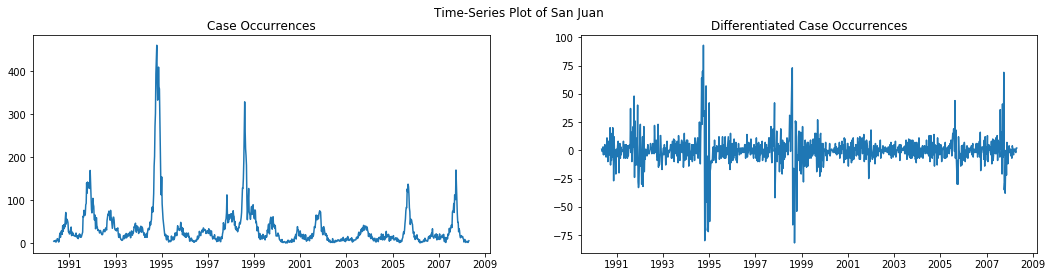

In [4]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
plt.plot(sj_y)
plt.title('Case Occurrences')

plt.subplot(1,2,2)
sj_y_diff = sj_y.diff().dropna()
plt.plot(sj_y_diff)
plt.title('Differentiated Case Occurrences')

plt.suptitle('Time-Series Plot of San Juan')
plt.show()

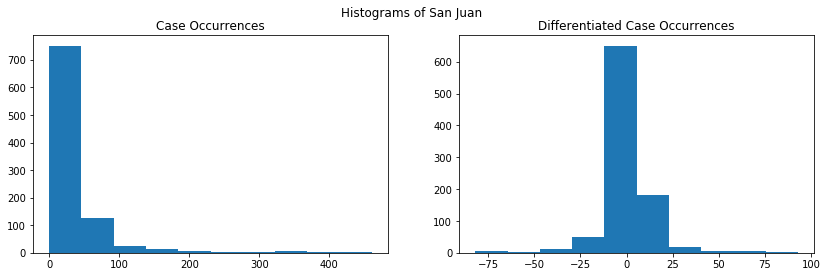

In [5]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.hist(sj_y.values)
plt.title('Case Occurrences')

plt.subplot(1,2,2)
plt.hist(sj_y_diff.values)
plt.title('Differentiated Case Occurrences')

plt.suptitle('Histograms of San Juan')
plt.show()

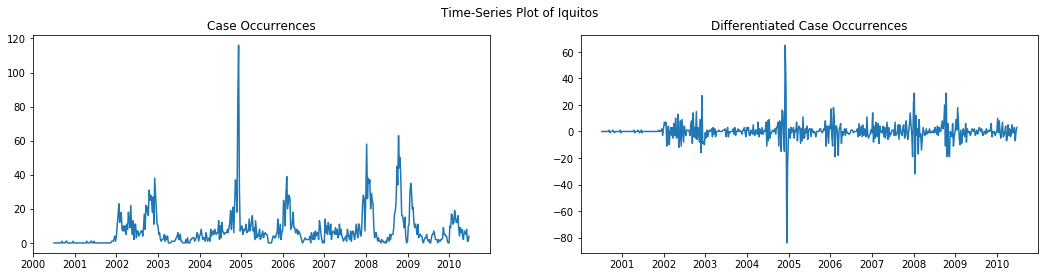

In [6]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
plt.plot(iq_y)
plt.title('Case Occurrences')

plt.subplot(1,2,2)
iq_y_diff = iq_y.diff().dropna()
plt.plot(iq_y_diff)
plt.title('Differentiated Case Occurrences')

plt.suptitle('Time-Series Plot of Iquitos')
plt.show()

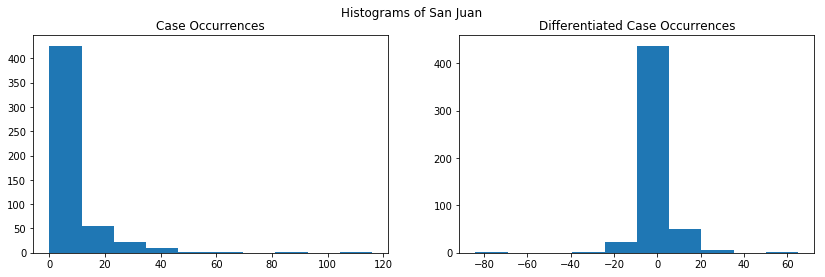

In [7]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.hist(iq_y.values)
plt.title('Case Occurrences')

plt.subplot(1,2,2)
plt.hist(iq_y_diff.values)
plt.title('Differentiated Case Occurrences')

plt.suptitle('Histograms of San Juan')
plt.show()

# Correlation Test - Normal vs. Differentiated Numbers of Cases

## Normal Case

In [8]:
sj_train = sj.iloc[:sj_train_no]
iq_train = iq.iloc[:iq_train_no]

sj_train['total_cases'] = sj_label.total_cases
iq_train['total_cases'] = iq_label.total_cases

sj_train['y_diff'] = sj_train.total_cases.diff()
iq_train['y_diff'] = iq_train.total_cases.diff()

In [9]:
sj_train.corr()['total_cases'].sort_values(ascending = False)

total_cases                              1.000000
reanalysis_specific_humidity_g_per_kg    0.206692
reanalysis_dew_point_temp_k              0.202624
station_avg_temp_c                       0.194323
reanalysis_max_air_temp_k                0.192559
station_max_temp_c                       0.187430
reanalysis_min_air_temp_k                0.186852
reanalysis_air_temp_k                    0.180534
station_min_temp_c                       0.175331
reanalysis_avg_temp_k                    0.173860
reanalysis_relative_humidity_percent     0.143687
y_diff                                   0.132591
reanalysis_precip_amt_kg_per_m2          0.106628
ndvi_nw                                  0.084408
reanalysis_sat_precip_amt_mm             0.059359
precipitation_amt_mm                     0.059359
ndvi_ne                                  0.058682
station_precip_mm                        0.051213
station_diur_temp_rng_c                  0.034147
ndvi_sw                                 -0.014922


In [10]:
sj_train.corr()['y_diff'].sort_values(ascending = False)

y_diff                                   1.000000
total_cases                              0.132591
station_avg_temp_c                       0.132587
station_min_temp_c                       0.126989
reanalysis_max_air_temp_k                0.119626
reanalysis_air_temp_k                    0.116034
reanalysis_avg_temp_k                    0.116005
reanalysis_specific_humidity_g_per_kg    0.113878
reanalysis_dew_point_temp_k              0.113163
reanalysis_min_air_temp_k                0.103616
station_max_temp_c                       0.097417
reanalysis_relative_humidity_percent     0.052950
precipitation_amt_mm                     0.051705
reanalysis_sat_precip_amt_mm             0.051705
reanalysis_tdtr_k                        0.033360
reanalysis_precip_amt_kg_per_m2          0.022331
ndvi_nw                                  0.021649
ndvi_se                                  0.021570
station_precip_mm                        0.016528
ndvi_sw                                  0.011924


In [11]:
iq_train.corr()['total_cases'].sort_values(ascending = False)

total_cases                              1.000000
y_diff                                   0.355154
reanalysis_specific_humidity_g_per_kg    0.235694
reanalysis_dew_point_temp_k              0.229675
reanalysis_min_air_temp_k                0.212808
station_min_temp_c                       0.195578
reanalysis_relative_humidity_percent     0.130551
station_avg_temp_c                       0.121369
reanalysis_precip_amt_kg_per_m2          0.101150
reanalysis_air_temp_k                    0.095535
reanalysis_sat_precip_amt_mm             0.091310
precipitation_amt_mm                     0.091310
reanalysis_avg_temp_k                    0.078613
station_max_temp_c                       0.076299
station_precip_mm                        0.044596
ndvi_sw                                  0.032812
ndvi_ne                                  0.020794
ndvi_nw                                 -0.009952
station_diur_temp_rng_c                 -0.033663
ndvi_se                                 -0.040643


In [12]:
iq_train.corr()['y_diff'].sort_values(ascending = False)

y_diff                                   1.000000
total_cases                              0.355154
ndvi_sw                                  0.080949
station_diur_temp_rng_c                  0.051274
ndvi_ne                                  0.043990
ndvi_nw                                  0.041549
station_max_temp_c                       0.035088
reanalysis_tdtr_k                        0.024006
ndvi_se                                  0.021042
reanalysis_max_air_temp_k                0.017186
reanalysis_air_temp_k                    0.016064
station_avg_temp_c                       0.009800
reanalysis_avg_temp_k                    0.006268
reanalysis_min_air_temp_k               -0.007368
station_min_temp_c                      -0.011927
reanalysis_precip_amt_kg_per_m2         -0.013678
precipitation_amt_mm                    -0.053257
reanalysis_sat_precip_amt_mm            -0.053257
reanalysis_relative_humidity_percent    -0.059749
reanalysis_dew_point_temp_k             -0.060032


From the correlation tables of both cities, the original value of number of occurrences seems to have higher correlation than the differentiated one. Hence, we will continue using the original value.

In [13]:
# Drop diff column
sj_train = sj_train.drop('y_diff', axis = 1)
iq_train = iq_train.drop('y_diff', axis = 1)

# Target Variable Normalization

## San Juan

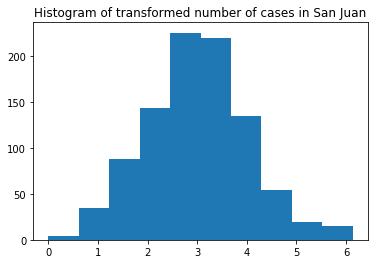

In [14]:
sj_y_log = np.log1p(sj_y)

plt.hist(sj_y_log.values)
plt.title('Histogram of transformed number of cases in San Juan')
plt.show()

## Iquitos

In [15]:
iq_pop = pd.read_csv('Data/iq_pop.csv')

In [16]:
iq_y_log = np.log1p(iq_y)

for i in range(iq_y_log.shape[0]):
    iq_y_log.iloc[i] = 100000 * iq_y_log.iloc[i] / iq_pop['Estimated_population'].iloc[np.argwhere(iq_pop['Year'] == iq_y_log.index.year[i])[0][0]]

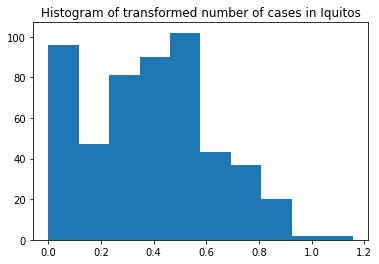

In [17]:
plt.hist(iq_y_log.values)
plt.title('Histogram of transformed number of cases in Iquitos')
plt.show()

# Improve Correlations - Greedy Alrogithm

In [18]:
def expfit(var, target, criteria = 0.00001):
    current_exp = 1
    step_exp = 0.005
    
    while True:
        if target.corr(var**(current_exp)) < target.corr(var**(current_exp + step_exp)):
            if target.corr(var**(current_exp + step_exp)) - target.corr(var**(current_exp)) > criteria:
                current_exp += step_exp
            else:
                break
        else:
            if target.corr(var**(current_exp)) < target.corr(var**(current_exp - step_exp)):
                if target.corr(var**(current_exp - step_exp)) - target.corr(var**(current_exp)) > criteria:
                    current_exp -= step_exp
                else:
                    break
            else:
                break
    return current_exp

In [19]:
sj_exps = [expfit(sj_train[col], sj_train.total_cases) for col in sj_train.columns[:-1]]
iq_exps = [expfit(iq_train[col], iq_train.total_cases) for col in iq_train.columns[:-1]]

In [20]:
# Multiply the multipliers to all independent variables

# First, check if the columns of sj_train and sj, the original data, are in the same order
for i in range(len(sj_train.columns[:-1])):
    assert sj_train.columns[i] == sj.columns[i]
# Do the same for Iquitos
for i in range(len(iq_train.columns[:-1])):
    assert iq_train.columns[i] == iq.columns[i]

sj_mul = sj.copy()
iq_mul = iq.copy()
    
# Multiply
for i in range(len(sj_exps)):
    sj_mul[sj_mul.columns[i]] = sj_mul[sj_mul.columns[i]] * sj_exps[i]
for i in range(len(iq_exps)):
    iq_mul[iq_mul.columns[i]] = iq_mul[iq_mul.columns[i]] * iq_exps[i]

In [21]:
# Check for correlations

sj_mul.corr()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
ndvi_ne,1.000000,0.690419,0.189309,0.186211,-0.010103,-0.033891,-0.032674,-0.003604,-0.008734,-0.044619,0.033992,0.053292,-0.010103,0.002894,-0.017418,0.064305,0.146422,0.090640,0.016351,-0.042467
ndvi_nw,0.690419,1.000000,0.182400,0.227543,0.010216,-0.036174,-0.035184,0.009317,-0.013763,-0.033824,0.050291,0.086663,0.010216,0.016714,-0.055368,0.080206,0.176227,0.118959,0.009028,-0.050157
ndvi_se,0.189309,0.182400,1.000000,0.823613,-0.123834,0.000337,0.005184,-0.051918,0.002807,-0.026540,-0.138380,-0.117334,-0.123834,-0.047811,0.033836,-0.046512,0.021031,-0.067773,-0.055777,-0.139042
ndvi_sw,0.186211,0.227543,0.823613,1.000000,-0.112384,-0.019091,-0.010130,-0.064917,0.004162,-0.045001,-0.109656,-0.110985,-0.112384,-0.057873,0.049247,-0.027277,0.082571,-0.022480,-0.057251,-0.158585
precipitation_amt_mm,-0.010103,0.010216,-0.123834,-0.112384,1.000000,0.239143,0.228456,0.404523,0.259636,0.248966,0.502707,0.501830,1.000000,0.412088,-0.106104,0.199442,-0.116814,0.205875,0.211678,0.529695
reanalysis_air_temp_k,-0.033891,-0.036174,0.000337,-0.019091,0.239143,1.000000,0.997548,0.906224,0.935047,0.942313,0.072732,0.309741,0.239143,0.908567,0.181067,0.892587,0.007155,0.709390,0.838005,0.133963
reanalysis_avg_temp_k,-0.032674,-0.035184,0.005184,-0.010130,0.228456,0.997548,1.000000,0.899442,0.939144,0.939969,0.056397,0.298527,0.228456,0.901378,0.203011,0.890899,0.024567,0.714770,0.832142,0.116378
reanalysis_dew_point_temp_k,-0.003604,0.009317,-0.051918,-0.064917,0.404523,0.906224,0.899442,1.000000,0.852606,0.896980,0.309863,0.682444,0.404523,0.998465,-0.016988,0.866878,-0.068637,0.699844,0.830324,0.300128
reanalysis_max_air_temp_k,-0.008734,-0.013763,0.002807,0.004162,0.259636,0.935047,0.939144,0.852606,1.000000,0.825951,0.088674,0.304298,0.259636,0.859021,0.358546,0.862404,0.090912,0.776896,0.774727,0.122893
reanalysis_min_air_temp_k,-0.044619,-0.033824,-0.026540,-0.045001,0.248966,0.942313,0.939969,0.896980,0.825951,1.000000,0.106301,0.386107,0.248966,0.894642,-0.040194,0.847157,-0.052854,0.627523,0.829660,0.160438


# Scaling Data - MaxAbsScaler

In [22]:
from sklearn.preprocessing import MaxAbsScaler

In [23]:
mas_sj = MaxAbsScaler().fit(sj_mul)
sj_scaled = mas_sj.transform(sj_mul)
sj_scaled_df = pd.DataFrame(sj_scaled, columns = sj_mul.columns, index = sj_mul.index)
sj_scaled_df['total_cases'] = sj_y

mas_iq = MaxAbsScaler().fit(iq_mul)
iq_scaled = mas_iq.transform(iq_mul)
iq_scaled_df = pd.DataFrame(iq_scaled, columns = iq_mul.columns, index = iq_mul.index)
iq_scaled_df['total_cases'] = iq_y

In [24]:
# Save
#sj_scaled_df.to_csv('Data/sj_scaled_20200522.csv')
#iq_scaled_df.to_csv('Data/iq_scaled_20200522.csv')

Next, we will build Machine Learning models from these data.<br><br>
Stay tuned!